In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot
%matplotlib inline

In [19]:
df = pd.read_csv('C:/Users/akshay_gane/Desktop/pract/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [21]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [22]:
df.groupby('left').mean()
#this will analyze only numericaldata it will skip text data. therfoore again need to consider text data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


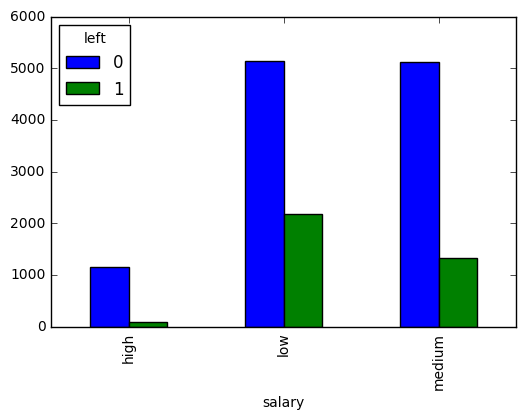

In [23]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')

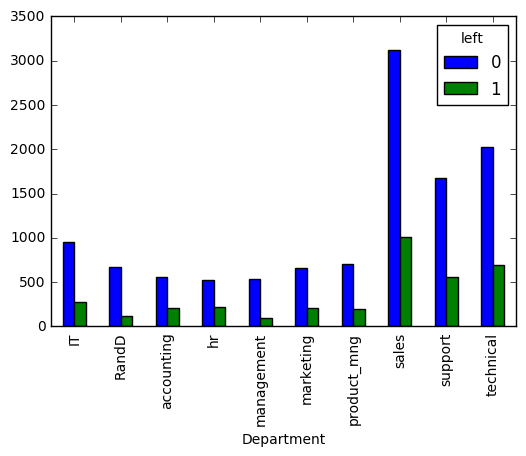

In [24]:
pd.crosstab(df.Department, df.left).plot(kind = 'bar')

In [25]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [28]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary')
data_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0.0,1.0,0.0
1,0.80,262,0,medium,0.0,0.0,1.0
2,0.11,272,0,medium,0.0,0.0,1.0
3,0.72,223,0,low,0.0,1.0,0.0
4,0.37,159,0,low,0.0,1.0,0.0


In [29]:
data_with_dummies.drop('salary', axis='columns', inplace=True)
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0.0,1.0,0.0
1,0.80,262,0,0.0,0.0,1.0
2,0.11,272,0,0.0,0.0,1.0
3,0.72,223,0,0.0,1.0,0.0
4,0.37,159,0,0.0,1.0,0.0


In [30]:
X = data_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0.0,1.0,0.0
1,0.80,262,0,0.0,0.0,1.0
2,0.11,272,0,0.0,0.0,1.0
3,0.72,223,0,0.0,1.0,0.0
4,0.37,159,0,0.0,1.0,0.0


In [31]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
logimod = LogisticRegression()
logimod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
logimod.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
logimod.score(X_test, y_test)

0.78133333333333332